**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
show_env()

You are working on        Singularity 
BASE DIRECTORY (FD_BASE): /mount 
REPO DIRECTORY (FD_REPO): /mount/repo 
WORK DIRECTORY (FD_WORK): /mount/work 
DATA DIRECTORY (FD_DATA): /mount/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /mount/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /mount/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /mount/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /mount/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /mount/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /mount/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /mount/repo/Proj_ENCODE_FCC/log 
PROJECT APP     (FD_APP): /mount/repo/Proj_ENCODE_FCC/app 
PROJECT REF     (FD_REF): /mount/repo/Proj_ENCODE_FCC/references 



**Set global variables**

In [1]:
TXT_FOLDER_REGION = "fcc_astarr_macs"

## Import data

In [3]:
txt_folder = TXT_FOLDER_REGION
txt_fdiry  = file.path(FD_RES, "region", txt_folder)

vec = dir(txt_fdiry)
for (txt in vec){cat(txt, "\n")}

ASTARRseq_K562_KS91.hg38.Input.rep_all.max_overlaps.q5.bed.gz 
ASTARRseq_K562_KS91.hg38.Input.rep_all.union.q5.bed.gz 
summary 


In [4]:
txt_folder = TXT_FOLDER_REGION
txt_fdiry  = file.path(FD_RES, "region", txt_folder, "summary")

vec = dir(txt_fdiry)
for (txt in vec){cat(txt, "\n")}

description.tsv 
metadata.label.tsv 


In [5]:
### set file path
txt_folder = TXT_FOLDER_REGION
txt_fdiry  = file.path(FD_RES, "region", txt_folder, "summary")
txt_fname = "description.tsv"
txt_fpath = file.path(txt_fdiry, txt_fname)

### read table
dat = read_tsv(txt_fpath, show_col_types = FALSE)

### assign and show
dat_cname     = dat
vec_txt_cname = dat$Name
fun_display_table(head(dat))

Name,Note
Chrom,Name of the chromosome
ChromStart,The starting position of the feature in the chromosome
ChromEnd,The ending position of the feature in the chromosome


In [6]:
### set file path
txt_folder = TXT_REGION_FOLDER
txt_fdiry  = file.path(FD_RES, "region", txt_folder)
txt_fname = "ASTARRseq_K562_KS91.hg38.Input.rep_all.union.q5.bed.gz"
txt_fpath = file.path(txt_fdiry, txt_fname)

### read table
dat = read_tsv(txt_fpath, col_names = vec_txt_cname, show_col_types = FALSE)

### assign and show
dat_region_union = dat
fun_display_table(head(dat))

Chrom,ChromStart,ChromEnd
chr1,10015,10442
chr1,14253,14645
chr1,16015,16477
chr1,17237,17772
chr1,28903,29613
chr1,30803,31072


In [7]:
### set file path
txt_folder = TXT_REGION_FOLDER
txt_fdiry  = file.path(FD_RES, "region", txt_folder)
txt_fname = "ASTARRseq_K562_KS91.hg38.Input.rep_all.max_overlaps.q5.bed.gz"
txt_fpath = file.path(txt_fdiry, txt_fname)

### read table
dat = read_tsv(txt_fpath, col_names = vec_txt_cname, show_col_types = FALSE)

### assign and show
dat_region_overlap = dat
fun_display_table(head(dat))

Chrom,ChromStart,ChromEnd
chr1,10038,10405
chr1,14282,14614
chr1,16025,16338
chr1,17288,17689
chr1,28934,29499
chr1,115429,115969


## Explore data

In [8]:
dat = dat_region_union
dat = dat %>% dplyr::mutate(Length = ChromEnd - ChromStart)

cat("#{Region} =", nrow(dat), "\n")
summary(dat)

#{Region} = 247520 


    Chrom             ChromStart           ChromEnd             Length      
 Length:247520      Min.   :       50   Min.   :      571   Min.   : 218.0  
 Class :character   1st Qu.: 32198891   1st Qu.: 32199271   1st Qu.: 435.0  
 Mode  :character   Median : 67062316   Median : 67063053   Median : 665.0  
                    Mean   : 79359206   Mean   : 79360006   Mean   : 800.2  
                    3rd Qu.:121127617   3rd Qu.:121128246   3rd Qu.:1031.0  
                    Max.   :248945796   Max.   :248946241   Max.   :7183.0  

In [9]:
dat = dat_region_overlap
dat = dat %>% dplyr::mutate(Length = ChromEnd - ChromStart)

cat("#{Region} =", nrow(dat), "\n")
summary(dat)

#{Region} = 150529 


    Chrom             ChromStart           ChromEnd             Length      
 Length:150529      Min.   :       55   Min.   :      559   Min.   :   1.0  
 Class :character   1st Qu.: 31730480   1st Qu.: 31730936   1st Qu.: 401.0  
 Mode  :character   Median : 65764510   Median : 65765030   Median : 597.0  
                    Mean   : 78390820   Mean   : 78391533   Mean   : 712.9  
                    3rd Qu.:119925081   3rd Qu.:119925548   3rd Qu.: 909.0  
                    Max.   :248945944   Max.   :248946229   Max.   :7154.0  

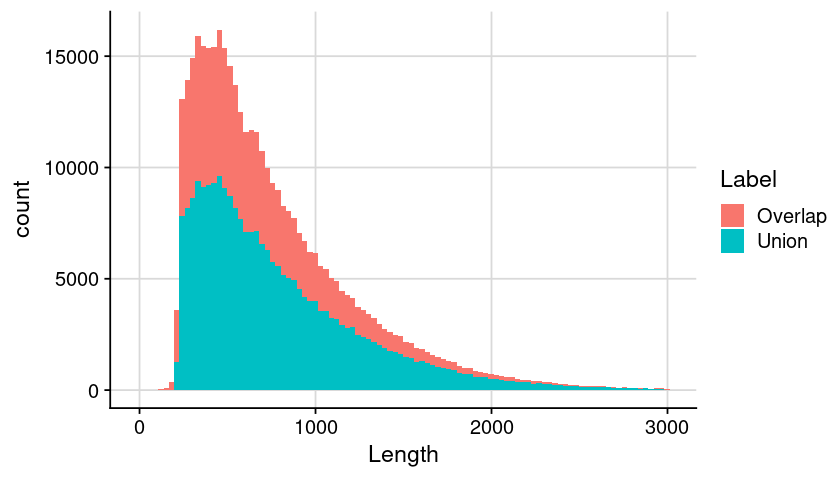

In [10]:
lst = list(
    "Union"   = dat_region_union,
    "Overlap" = dat_region_overlap
)

dat  = bind_rows(lst, .id = "Label")
dat = dat %>% 
    dplyr::mutate(Length = ChromEnd - ChromStart) %>%
    dplyr::filter(Length < 3000)

gpt = ggplot(dat, aes(x = Length, fill = Label)) + 
    geom_histogram(bins = 100) + 
    theme_cowplot() + 
    background_grid()

options(repr.plot.height=4, repr.plot.width=7)
print(gpt)

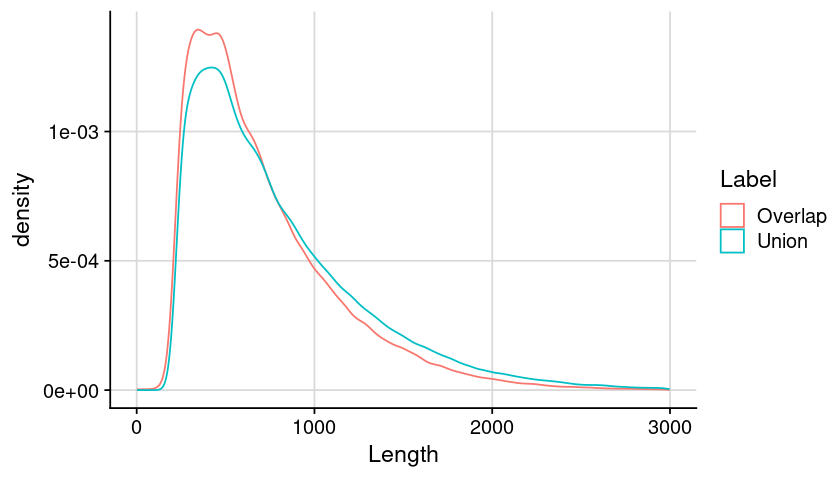

In [11]:
lst = list(
    "Union"   = dat_region_union,
    "Overlap" = dat_region_overlap
)

dat  = bind_rows(lst, .id = "Label")
dat = dat %>% 
    dplyr::mutate(Length = ChromEnd - ChromStart) %>%
    dplyr::filter(Length < 3000)

gpt = ggplot(dat, aes(x = Length, color = Label)) + 
    geom_density() +
    theme_cowplot() + 
    background_grid()

options(repr.plot.height=4, repr.plot.width=7)
print(gpt)